# ÿ®ÿ≥ŸÖ ÿßŸÑŸÑŸá ÿßŸÑÿ±ÿ≠ŸÖŸÜ ÿßŸÑÿ±ÿ≠€åŸÖ

# ŸÖÿ≠ŸÖÿØ ŸÖŸáÿØ€å ÿ¥ŸÅ€åŸÇ€å - Ÿæÿ±Ÿà⁄òŸá ŸÜŸáÿß€å€å ÿØÿ±ÿ≥ ŸÖÿ®ÿßÿ≠ÿ´ Ÿà€å⁄òŸá

# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¥ÿ®⁄©Ÿá ŸáŸÖ⁄©ÿßÿ±€å ÿπŸÑŸÖ€å CA-HepTh

ÿß€åŸÜ Ÿæÿ±Ÿà⁄òŸá ÿ®Ÿá ÿ™ÿ≠ŸÑ€åŸÑ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿ≥ÿßÿÆÿ™ÿßÿ±€å Ÿà ÿØ€åŸÜÿßŸÖ€å⁄©€å ÿ¥ÿ®⁄©Ÿá ŸáŸÖ‚ÄåŸÜŸà€åÿ≥ŸÜÿØ⁄Ø€å ÿØÿ± ÿ≠Ÿàÿ≤Ÿá ŸÅ€åÿ≤€å⁄© ÿßŸÜÿ±⁄ò€å ÿ®ÿßŸÑÿß ŸÖ€å‚ÄåŸæÿ±ÿØÿßÿ≤ÿØ.

In [ ]:
# ŸÅŸÇÿ∑ ÿØÿ± ÿµŸàÿ±ÿ™ ŸÜ€åÿßÿ≤ ÿßÿ¨ÿ±ÿß ⁄©ŸÜ
!pip install --quiet networkx pandas numpy matplotlib python-louvain tqdm scipy
# ÿ®ÿ±ÿß€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ÿ®Ÿáÿ™ÿ± (ÿßÿÆÿ™€åÿßÿ±€åÿå ÿ≥ÿ±€åÿπ‚Äåÿ™ÿ± Ÿà ŸÖŸÇ€åÿßÿ≥‚ÄåŸæÿ∞€åÿ±ÿ™ÿ±)
!pip install --quiet python-igraph leidenalg


## ÿ™ŸÜÿ∏€åŸÖ ŸÖÿ≥€åÿ± ÿØÿßÿØŸá ‚Äî ŸÖÿ≥€åÿ± ÿ±ÿß ÿ∑ÿ®ŸÇ ŸÖÿ≠ŸÑ ŸàÿßŸÇÿπ€å ÿ™ÿ∫€å€åÿ± ÿ®ÿØŸá


In [2]:
DATA_FOLDER = "../data/cit-HepTh-abstracts"   # ŸÖÿ≠ÿ™Ÿàÿß€å ŸæŸàÿ¥Ÿá: 1992/, 1993/, ...


# ÿß€åŸÖŸæŸàÿ±ÿ™‚ÄåŸáÿß€å Ÿæÿß€åŸá


In [3]:
import os, re, gc, pickle, math, time
from itertools import combinations
from collections import defaultdict
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# ÿ™Ÿàÿßÿ®ÿπ ŸÖŸÅ€åÿØ


In [4]:
def save_pickle(obj, path):
    with open(path, "wb") as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)


# ⁄Ü⁄© ŸÖÿ≠€åÿ∑ Ÿà ŸÜŸÖŸàŸÜŸá‚Äåÿ®ÿ±ÿØÿßÿ±€å ŸÅÿß€åŸÑ‚ÄåŸáÿß + ÿ™ÿßÿ®ÿπ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÜŸà€åÿ≥ŸÜÿØŸá (ÿßÿ¨ÿ±ÿß€å ÿßŸàŸÑ€åŸá)

ŸáÿØŸÅ ÿß€åŸÜ ÿ®ŸÑŸà⁄© ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá ÿ®ŸÅŸáŸÖ€åŸÖ ÿ≥ÿßÿÆÿ™ÿßÿ± ŸÅÿß€åŸÑ‚ÄåŸáÿß€å .abs ⁄Ü⁄ØŸàŸÜŸá ÿßÿ≥ÿ™ÿå ÿ™ÿπÿØÿßÿØ ŸÅÿß€åŸÑ‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ŸæŸàÿ¥Ÿá ⁄ÜŸÇÿØÿ± ÿßÿ≥ÿ™ÿå Ÿà €å⁄© ÿ™ÿßÿ®ÿπ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨Ÿê ŸÜŸà€åÿ≥ŸÜÿØŸáŸî ŸÖŸÇÿßŸàŸÖ/ŸÇŸà€å ÿ®ŸÜŸà€åÿ≥€åŸÖ ⁄©Ÿá ÿ±Ÿà€å ÿØÿßÿØŸáŸî ŸàÿßŸÇÿπ€å ⁄©ÿßÿ± ⁄©ŸÜÿØ ‚Äî ÿ®ÿπÿØ ÿßÿ≤ ÿßÿ¨ÿ±ÿß€å ÿß€åŸÜ ÿ®ŸÑŸà⁄© ÿ®Ÿá‚Äåÿ±ÿßÿ≠ÿ™€å ŸÖ€å‚Äåÿ™ŸàÿßŸÜ€åŸÖ ÿ®ŸÇ€åŸáŸî Ÿæÿ±ÿØÿßÿ≤ÿ¥ (ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ ÿ≤ŸÖÿßŸÜ€å) ÿ±ÿß ÿß€åŸÖŸÜ ÿßÿ¨ÿ±ÿß ⁄©ŸÜ€åŸÖ.

In [6]:
# A-0: Environment check + sample parsing of .abs files
# ÿßÿ¨ÿ±ÿß ÿØÿ± €å⁄© ÿ≥ŸÑŸàŸÑ ÿ¨ÿØ€åÿØ ÿØÿ± Jupyter notebook

import os, re, time
from collections import defaultdict
from itertools import combinations
try:
    from tqdm.auto import tqdm
except Exception:
    # tqdm ÿßÿÆÿ™€åÿßÿ±€å ÿßÿ≥ÿ™ÿõ ÿß⁄Øÿ± ŸÜÿµÿ® ŸÜ€åÿ≥ÿ™ÿå ÿßÿ≤ ÿ¢ŸÜ ÿµÿ±ŸÅŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ
    def tqdm(x, **_): 
        return x

# ŸÖÿ≥€åÿ±Ÿê ŸæŸàÿ¥Ÿá‚Äå€å cit-HepTh-abstracts ÿ±ÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≥ÿßÿÆÿ™ÿßÿ± ÿ™Ÿà ÿ™ŸÜÿ∏€åŸÖ ⁄©ŸÜ:
DATA_ROOT = "../data/cit-HepTh-abstracts"   # ÿß⁄Øÿ± ŸÖÿ≥€åÿ±ÿ™ ŸÖÿ™ŸÅÿßŸàÿ™ ÿßÿ≥ÿ™ ÿß€åŸÜ ÿ±ÿß ÿ™ÿ∫€å€åÿ± ÿ®ÿØŸá

# 1) ÿ¥ŸÖÿßÿ±ÿ¥ ŸÅÿß€åŸÑ‚ÄåŸáÿß Ÿà ŸÜÿßŸÖ ŸæŸàÿ¥Ÿá‚ÄåŸáÿß (ÿ≥ÿßŸÑ‚ÄåŸáÿß)
years = sorted([d for d in os.listdir(DATA_ROOT) if os.path.isdir(os.path.join(DATA_ROOT, d))])
print("Found year-folders (sample):", years[:6], " ... total:", len(years))

year_file_counts = {}
total_files = 0
for y in years:
    p = os.path.join(DATA_ROOT, y)
    files = [f for f in os.listdir(p) if f.endswith('.abs')]
    year_file_counts[y] = len(files)
    total_files += len(files)

print(f"Total .abs files: {total_files}")
print("Files per year (first 10):")
for y in years[:10]:
    print(f"  {y}: {year_file_counts[y]} files")

# 2) Robust author-extraction function (tries ⁄ÜŸÜÿØ ÿßŸÑ⁄ØŸà)
_author_patterns = [
    re.compile(r'Authors:\s*(.*?)\n(?:Title:|Comments:|\\\n|$)', re.DOTALL | re.IGNORECASE),
    re.compile(r'Authors:\s*(.*)', re.IGNORECASE),
]

def extract_authors_from_text(txt):
    """
    ÿ™ŸÑÿßÿ¥ ŸÖ€å ⁄©ŸÜÿØ ÿ±ÿ¥ÿ™Ÿá‚Äå€å ŸÜŸà€åÿ≥ŸÜÿØ⁄ØÿßŸÜ ÿ±ÿß ÿßÿ≤ ŸÖÿ™ŸÜ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ⁄©ŸÜÿØ.
    ÿ®ÿßÿ≤⁄Øÿ¥ÿ™€å: ŸÑ€åÿ≥ÿ™ ÿßÿ≥ÿßŸÖ€å ŸÜŸà€åÿ≥ŸÜÿØŸá‚ÄåŸáÿß (Ÿáÿ± ÿßÿ≥ŸÖ ÿ™ŸÖ€åÿ≤ÿ¥ÿØŸá)
    """
    # ÿ®ÿπÿ∂€å ŸÅÿß€åŸÑ‚ÄåŸáÿß ÿßÿ≤ backslash \\ ÿ®ÿ±ÿß€å ÿ¨ÿØÿß ⁄©ÿ±ÿØŸÜ ÿ®ÿÆÿ¥‚ÄåŸáÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äå⁄©ŸÜŸÜÿØÿå ÿ¢ŸÜ‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá newline ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜ
    t = txt.replace('\\\n', '\n').replace('\\', '\n')
    authors_text = None
    for pat in _author_patterns:
        m = pat.search(t)
        if m:
            authors_text = m.group(1)
            break
    if not authors_text:
        # fallback: ÿÆÿ∑€å ÿ¨ÿ≥ÿ™ÿ¨Ÿà ⁄©ŸÜ
        for line in t.splitlines():
            if line.strip().lower().startswith("authors:"):
                authors_text = line.split(':',1)[1]
                break
    if not authors_text:
        return []  # Ÿá€å⁄Ü ŸÜŸà€åÿ≥ŸÜÿØŸá‚Äåÿß€å Ÿæ€åÿØÿß ŸÜÿ¥ÿØ

    # Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å Ÿà ÿ¨ÿØÿßÿ≥ÿßÿ≤€å: "and" Ÿà ⁄©ÿßŸÖÿß Ÿà ; ÿ±ÿß ŸÖÿØŸÜÿ∏ÿ± ŸÇÿ±ÿßÿ± ÿ®ÿØŸá
    authors_text = authors_text.replace('\n', ' ')
    # ÿ®ÿπÿ∂€å ŸÅÿ±ŸÖÿ™‚ÄåŸáÿß "A and B" ÿØÿßÿ±ŸÜÿØ
    authors_text = re.sub(r'\sand\s', ',', authors_text)
    # ÿ¨ÿØÿß⁄©ŸÜŸÜÿØŸá‚ÄåŸáÿß: ',' €åÿß ';' €åÿß ' and '
    parts = re.split(r',|;|\band\b', authors_text)
    authors = []
    for p in parts:
        p = p.strip()
        if not p:
            continue
        # ÿ≠ÿ∞ŸÅ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±Ÿê ÿßÿ≥ŸÖ (ŸÖÿ´ŸÑ affiliation ÿØÿßÿÆŸÑ Ÿæÿ±ÿßŸÜÿ™ÿ≤)
        p = re.sub(r'\(.*?\)', '', p).strip()
        # normalize spaces
        p = re.sub(r'\s+', ' ', p)
        authors.append(p)
    # unique preserving order
    seen = set()
    authors_clean = []
    for a in authors:
        key = a.lower()
        if key not in seen:
            seen.add(key)
            authors_clean.append(a)
    return authors_clean

# 3) ŸÜŸÖÿß€åÿ¥ ⁄ÜŸÜÿØ ŸÜŸÖŸàŸÜŸá ŸÅÿß€åŸÑ Ÿà ŸÜÿ™€åÿ¨Ÿá‚Äå€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÜŸà€åÿ≥ŸÜÿØŸá
SAMPLES_TO_SHOW = 6
sample_files = []
for y in years:
    d = os.path.join(DATA_ROOT, y)
    files = [f for f in os.listdir(d) if f.endswith('.abs')]
    if files:
        sample_files.append((y, files[:1][0], os.path.join(d, files[0])))
    if len(sample_files) >= SAMPLES_TO_SHOW:
        break

print("\nSample files and extracted authors:")
for y, fname, fpath in sample_files:
    try:
        with open(fpath, 'r', encoding='utf-8', errors='ignore') as fh:
            txt = fh.read(4000)  # ŸÅŸÇÿ∑ 4k ÿßŸàŸÑ ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥
    except Exception as e:
        txt = f"(error reading: {e})"
    authors = extract_authors_from_text(txt)
    print(f"\nYear {y} | file: {fname}")
    print(" Extracted authors:", authors[:10])

# 4) (ÿßÿÆÿ™€åÿßÿ±€å) ÿ™ÿ≥ÿ™ ÿ≤ŸÖÿßŸÜ ÿÆŸàÿßŸÜÿØŸÜ ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ŸÅÿß€åŸÑ‚ÄåŸáÿß
NTEST = 200   # ÿ™ÿπÿØÿßÿØ ŸÅÿß€åŸÑ‚ÄåŸáÿß ⁄©Ÿá ÿ®ÿ±ÿß€å ÿ≥ŸÜÿ¨ÿ¥ ÿ≥ÿ±ÿπÿ™ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ®ÿ±ÿ±ÿ≥€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ
t0 = time.time()
count = 0
for y in years:
    d = os.path.join(DATA_ROOT, y)
    for fn in os.listdir(d):
        if not fn.endswith('.abs'):
            continue
        count += 1
        if count > NTEST:
            break
    if count > NTEST:
        break
t1 = time.time()
print(f"\nRough IO check: enumerated ~{min(count, NTEST)} files in {t1-t0:.2f}s")

print("\nA-0 done. If sample author extraction looks reasonable, reply with 'A-0 OK' and we'll run A-1: build efficient temporal-edge lists (ids + per-year CSV dump).")


Found year-folders (sample): ['1992', '1993', '1994', '1995', '1996', '1997']  ... total: 12
Total .abs files: 29555
Files per year (first 10):
  1992: 1367 files
  1993: 2058 files
  1994: 2377 files
  1995: 2303 files
  1996: 2606 files
  1997: 2673 files
  1998: 2758 files
  1999: 2803 files
  2000: 3126 files
  2001: 3153 files

Sample files and extracted authors:

Year 1992 | file: 9201001.abs
 Extracted authors: ['C. Itzykson', 'J.-B. Zuber']

Year 1993 | file: 9301001.abs
 Extracted authors: ['G.K.Savvidy', 'K.G.Savvidy']

Year 1994 | file: 9401001.abs
 Extracted authors: ['Jorge Ananias Neto']

Year 1995 | file: 9501001.abs
 Extracted authors: []

Year 1996 | file: 9601001.abs
 Extracted authors: []

Year 1997 | file: 9701001.abs
 Extracted authors: ['M. Zyskin We consider d-dimensional Riemanian manifolds which admit d-2 commuting space-like Killing vector fields', 'orthogonal to a surface', 'containing two one-parametric families of light-like curves. The condition of the Ric

# ÿ≥ÿßÿÆÿ™ IDŸáÿß Ÿà ŸÅÿß€åŸÑ‚ÄåŸáÿß€å €åÿßŸÑ (per-year CSV) ‚Äî ÿ≠ÿßŸÅÿ∏Ÿá‚ÄåŸæÿ≥ŸÜÿØ

ŸáÿØŸÅ ÿß€åŸÜ ⁄ØÿßŸÖ:

ÿ®Ÿá Ÿáÿ± ŸÜŸà€åÿ≥ŸÜÿØŸá €å⁄© ÿ¥ŸÜÿßÿ≥Ÿá‚Äå€å ÿπÿØÿØ€å (int ID) ŸÜÿ≥ÿ®ÿ™ ÿØŸá€åŸÖ (map: author -> id) ÿ™ÿß Ÿæÿ±ÿØÿßÿ≤ÿ¥‚ÄåŸáÿß€å ÿ®ÿπÿØ€å ÿ≥ÿ±€åÿπ Ÿà ÿ≠ÿßŸÅÿ∏Ÿá‚ÄåŸæÿ≥ŸÜÿØ ÿ¥ŸàŸÜÿØ.

ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ €å⁄© ŸÅÿß€åŸÑ CSV ÿ®ÿ≥ÿßÿ≤€åŸÖ ⁄©Ÿá Ÿáÿ± ÿ≥ÿ∑ÿ±ÿ¥ €å⁄© €åÿßŸÑŸê ÿ®ÿØŸàŸÜ‚Äåÿ¨Ÿáÿ™ (undirected) ÿ±ÿß ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ src_id,dst_id,year ÿ∞ÿÆ€åÿ±Ÿá ⁄©ŸÜÿØ.

€åÿßŸÑ‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿ≥ÿßŸÑ ÿ®ÿØŸàŸÜ ÿ™⁄©ÿ±ÿßÿ± (deduped) ÿ®ÿßÿ¥ŸÜÿØ Ÿà ÿ¨ŸÅÿ™‚ÄåŸáÿß ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ ŸÖÿ±ÿ™ÿ® ÿ¥ÿØŸá (min_id,max_id) ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ŸàŸÜÿØ ÿ™ÿß ÿ™⁄©ÿ±ÿßÿ±‚ÄåŸáÿß€å (u,v) Ÿà (v,u) €å⁄©ÿ≥ÿßŸÜ ÿ¥ŸÜÿßÿÆÿ™Ÿá ÿ¥ŸàŸÜÿØ.

€å⁄© ŸÅÿß€åŸÑ nodes.csv ÿ®ÿ≥ÿßÿ≤€åŸÖ ⁄©Ÿá id ‚Üí author_name ŸÜ⁄ØŸá ÿØÿßÿ±ÿØ (ÿ®ÿ±ÿß€å ŸÖÿ±ÿ¨ÿπ Ÿà ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å ÿ®ÿπÿØ€å).

In [12]:
# A-1: Build temporal edge lists (author -> id map + per-year deduped CSVs)
import os, re, time, csv
from itertools import combinations
from collections import defaultdict, OrderedDict

# ŸÖÿ≥€åÿ± Ÿàÿ±ŸàÿØ€å (ŸæŸàÿ¥Ÿá cit-HepTh-abstracts) ‚Äî ÿß⁄Øÿ± ŸÖÿ≥€åÿ±ÿ™ ŸÅÿ±ŸÇ ÿØÿßÿ±Ÿá ÿß€åŸÜÿ¨ÿß ÿ±ÿß ÿ™ÿ∫€å€åÿ± ÿ®ÿØŸá
DATA_ROOT = "../data/cit-HepTh-abstracts"
OUT_DIR = "../data/edges_by_year"   # ÿÆÿ±Ÿàÿ¨€å: ŸÅÿß€åŸÑ‚ÄåŸáÿß€å CSV ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ Ÿà nodes.csv

os.makedirs(OUT_DIR, exist_ok=True)

# ÿ™ÿßÿ®ÿπ ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÜŸà€åÿ≥ŸÜÿØŸá ÿ±ÿß ÿßÿ≤ A-0 ÿ®€åÿßŸàÿ± (€åÿß ÿßÿ≤ src/data_parser.py)
# ÿß⁄Øÿ± ÿØÿ± ŸÜŸàÿ™ ÿ®Ÿà⁄© ŸÇÿ®ŸÑ€å ÿ™ÿπÿ±€åŸÅ ÿ¥ÿØŸá ŸÖ€å‚Äåÿ™ŸàÿßŸÜ ŸÖÿ≥ÿ™ŸÇ€åŸÖÿßŸã ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ÿ±ÿØÿõ ÿØÿ± ÿ∫€åÿ± ÿß€åŸÜ ÿµŸàÿ±ÿ™ ÿß€åŸÜ Ÿæ€åÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ±ÿß ⁄©Ÿæ€å ⁄©ŸÜ:
def extract_authors_from_text(txt):
    t = txt.replace('\\\n', '\n').replace('\\', '\n')
    # ÿßŸÑ⁄ØŸàŸáÿß€å ÿ≥ÿßÿØŸá
    m = re.search(r'Authors:\s*(.*?)\n(?:Title:|Comments:|\\\n|$)', t, re.DOTALL | re.IGNORECASE)
    authors_text = None
    if m:
        authors_text = m.group(1)
    else:
        # fallback ÿÆÿ∑€å
        for line in t.splitlines():
            if line.strip().lower().startswith("authors:"):
                authors_text = line.split(':',1)[1]
                break
    if not authors_text:
        return []
    authors_text = authors_text.replace('\n', ' ')
    authors_text = re.sub(r'\sand\s', ',', authors_text)
    parts = re.split(r',|;|\band\b', authors_text)
    authors = []
    for p in parts:
        p = p.strip()
        if not p:
            continue
        p = re.sub(r'\(.*?\)', '', p).strip()
        p = re.sub(r'\s+', ' ', p)
        authors.append(p)
    seen = set(); out=[]
    for a in authors:
        k = a.lower()
        if k not in seen:
            seen.add(k); out.append(a)
    return out

# 1) scan years (sorted)
years = sorted([d for d in os.listdir(DATA_ROOT) if os.path.isdir(os.path.join(DATA_ROOT, d))])
print("Years found:", years)

# global author -> id mapping (OrderedDict to keep insertion order stable)
author2id = OrderedDict()
next_id = 0

# We'll store for each year a set of edges (tuple (u_id, v_id) with u<v)
# For memory-safety: we'll use a set per year (dataset small enough). If memory problem ÿØÿßÿ¥ÿ™€åŸÖÿå
# ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿ≥ÿ™€åŸÖ flush ÿ®Ÿá ŸÅÿß€åŸÑ ŸÖŸàŸÇÿ™ Ÿà merge Ÿæÿ≥ ÿßÿ≤ ÿ¢ŸÜ ÿßŸÜÿ¨ÿßŸÖ ÿØŸá€åŸÖ.
year_edge_counts = {}
start = time.time()

for y in years:
    year_dir = os.path.join(DATA_ROOT, y)
    edge_set = set()
    files = [f for f in os.listdir(year_dir) if f.endswith('.abs')]
    # progress print
    t0 = time.time()
    for i,fn in enumerate(files):
        fpath = os.path.join(year_dir, fn)
        with open(fpath, 'r', encoding='utf-8', errors='ignore') as fh:
            txt = fh.read()
        authors = extract_authors_from_text(txt)
        if len(authors) < 2:
            continue
        # assign ids
        ids = []
        for a in authors:
            key = a.strip()
            if key not in author2id:
                author2id[key] = next_id
                ids.append(next_id)
                next_id += 1
            else:
                ids.append(author2id[key])
        # all pairs (undirected clique)
        for u,v in combinations(ids, 2):
            if u == v:
                continue
            a,b = (u,v) if u < v else (v,u)
            edge_set.add((a,b))
    # write deduped per-year csv
    out_csv = os.path.join(OUT_DIR, f"edges_{y}.csv")
    with open(out_csv, 'w', newline='', encoding='utf-8') as csvf:
        writer = csv.writer(csvf)
        # header optional
        writer.writerow(["src","dst","year"])
        for (u,v) in sorted(edge_set):
            writer.writerow([u,v,y])
    year_edge_counts[y] = len(edge_set)
    print(f"Year {y}: processed {len(files)} files -> {year_edge_counts[y]} unique edges  (time: {time.time()-t0:.2f}s)")

# write nodes file
nodes_file = os.path.join(OUT_DIR, "nodes.csv")
with open(nodes_file, 'w', newline='', encoding='utf-8') as nf:
    w = csv.writer(nf)
    w.writerow(["id","author"])
    for author,aid in author2id.items():
        w.writerow([aid, author])

total_time = time.time() - start
print("\nDone. Total authors (unique):", len(author2id))
print("Per-year edge counts:", year_edge_counts)
print("Nodes file saved to:", nodes_file)
print("Per-year CSVs saved to:", OUT_DIR)
print(f"Elapsed time: {total_time:.2f}s")


Years found: ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003']
Year 1992: processed 1367 files -> 1911 unique edges  (time: 0.26s)
Year 1993: processed 2058 files -> 2673 unique edges  (time: 0.39s)
Year 1994: processed 2377 files -> 3131 unique edges  (time: 0.45s)
Year 1995: processed 2303 files -> 3588 unique edges  (time: 0.44s)
Year 1996: processed 2606 files -> 4876 unique edges  (time: 0.59s)
Year 1997: processed 2673 files -> 3823 unique edges  (time: 1.42s)
Year 1998: processed 2758 files -> 4340 unique edges  (time: 1.16s)
Year 1999: processed 2803 files -> 4595 unique edges  (time: 1.41s)
Year 2000: processed 3126 files -> 4755 unique edges  (time: 1.55s)
Year 2001: processed 3153 files -> 5064 unique edges  (time: 1.61s)
Year 2002: processed 3312 files -> 6656 unique edges  (time: 1.53s)
Year 2003: processed 1019 files -> 2240 unique edges  (time: 0.43s)

Done. Total authors (unique): 16715
Per-year edge counts: {'1992': 1911, 

ÿßŸÑÿßŸÜ ŸÖÿß €å⁄© ŸÜÿ≥ÿÆŸá ÿ™ŸÖ€åÿ≤ Ÿà ÿ®Ÿá€åŸÜŸá ÿßÿ≤ €åÿßŸÑ‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å ÿØÿßÿ±€åŸÖ ⁄©Ÿá:

€±€∂Ÿ¨€∑€±€µ ŸÜŸà€åÿ≥ŸÜÿØŸá €å⁄©ÿ™ÿß (id ‚Üí name)

€åÿßŸÑ‚ÄåŸáÿß€å ŸÖŸÜÿ≠ÿµÿ± ÿ®Ÿá ŸÅÿ±ÿØ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ ÿ®ÿØŸàŸÜ ÿ™⁄©ÿ±ÿßÿ±

ŸáŸÖŸá‚Äå⁄Ü€åÿ≤ ÿ¢ŸÖÿßÿØŸá ÿ®ÿ±ÿß€å ÿ≥ÿßÿÆÿ™ snapshot‚Äå Ÿáÿß€å ⁄Øÿ±ÿßŸÅ Ÿà ÿ™ÿ≠ŸÑ€åŸÑ ÿ¥ÿßÿÆÿµ‚ÄåŸáÿßÿ≥ÿ™

ÿ≠ÿßŸÑÿß ŸÖ€å‚Äåÿ™ŸàÿßŸÜ€åŸÖ Ÿàÿßÿ±ÿØ A-2 ÿ¥Ÿà€åŸÖ:

ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ ÿßÿ≤ ÿ±Ÿà€å CSVŸáÿß

ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¥ÿßÿÆÿµ‚ÄåŸáÿß€å Ÿæÿß€åŸá ÿ®ÿ±ÿß€å Ÿáÿ± snapshot (Average Degree, Density, Clustering Coefficientÿå ÿßŸÜÿØÿßÿ≤Ÿá ŸÖŸàŸÑŸÅŸá ÿ®ÿ≤ÿ±⁄Øÿå Approx Diameterÿå Approx Betweennessÿå PageRank Ÿà ÿ∫€åÿ±Ÿá)

ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨ ÿØÿ± €å⁄© ÿ¨ÿØŸàŸÑ (DataFrame) ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿØÿ± ÿ™ÿ≠ŸÑ€åŸÑ ÿ±ÿ¥ÿØ Ÿà ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß

# ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ Ÿæÿß€åŸá

ÿÆŸàÿßŸÜÿØŸÜ CSV ŸáŸÖÿßŸÜ ÿ≥ÿßŸÑ Ÿà ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ ÿ®ÿß NetworkX

ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¥ÿßÿÆÿµ‚ÄåŸáÿß:

avg_degree ‚Üí ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿØÿ±ÿ¨Ÿá

density ‚Üí ⁄Ü⁄ØÿßŸÑ€å ⁄Øÿ±ÿßŸÅ

num_nodes, num_edges ‚Üí ÿ™ÿπÿØÿßÿØ ⁄Øÿ±Ÿá Ÿà €åÿßŸÑ

largest_cc_size ‚Üí ÿßŸÜÿØÿßÿ≤Ÿá ÿ®ÿ≤ÿ±⁄Ø‚Äåÿ™ÿ±€åŸÜ ŸÖÿ§ŸÑŸÅŸá ŸáŸÖÿ®ŸÜÿØ

avg_clustering ‚Üí ÿ∂ÿ±€åÿ® ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ŸÖ€åÿßŸÜ⁄Ø€åŸÜ

approx_diameter ‚Üí ŸÇÿ∑ÿ± ÿ™ŸÇÿ±€åÿ®€å ÿ®ÿß BFS sampling

betweenness_approx ‚Üí ÿ®€åŸÜÿßÿ®€åŸÜ€å ÿ™ŸÇÿ±€åÿ®€å ÿ®ÿß k ⁄Øÿ±Ÿá ŸÜŸÖŸàŸÜŸá

pagerank ‚Üí Ÿæ€åÿ¨‚Äåÿ±ŸÜ⁄© ÿ®ÿß Ÿæ€åÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å Sparse Power Iteration ⁄©Ÿá ŸÜŸàÿ¥ÿ™€åŸÖ

ÿ∞ÿÆ€åÿ±Ÿá ŸáŸÖŸá ÿØÿ± €å⁄© DataFrame Ÿà ÿ≥€åŸà ÿ®Ÿá CSV ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿ®ÿπÿØ€å.

Processing years:   0%|          | 0/12 [00:00<?, ?it/s]

‚úÖ Temporal metrics saved to: ../outputs\temporal_metrics.csv

Summary of computed metrics:
   year  nodes_snapshot  edges_snapshot  avg_degree_snapshot  density_snapshot
0  1992            1451            1911             2.634045          0.001817
1  1993            1944            2673             2.750000          0.001415
2  1994            2351            3131             2.663547          0.001133
3  1995            2417            3588             2.968970          0.001229
4  1996            3033            4876             3.215298          0.001060
‚úÖ Densification plot saved to: ../outputs\densification_law.png
‚úÖ Diameter trend plot saved to: ../outputs\diameter_trend.png

A-2 completed successfully! Next steps:
- Community detection (Louvain/Leiden)
- SI model simulation
- Advanced centrality analysis


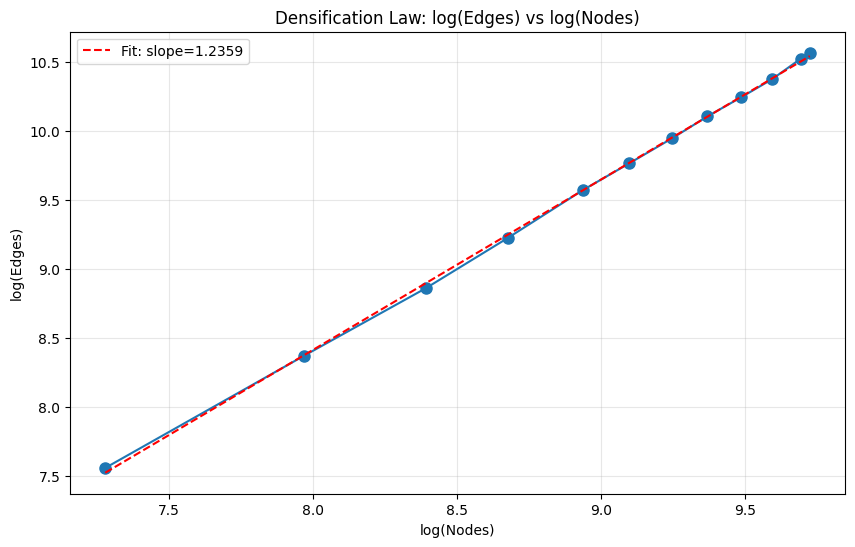

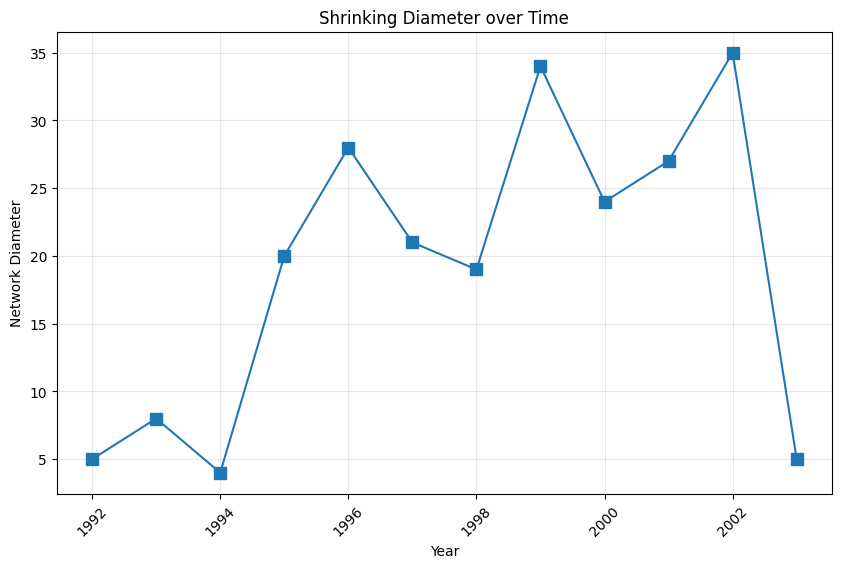

In [18]:
# A-2: ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å Ÿà ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿ¥ÿ®⁄©Ÿá
import os
import csv
import networkx as nx
import pandas as pd
from tqdm.auto import tqdm
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÖÿ≥€åÿ±Ÿáÿß
EDGES_DIR = "../data/edges_by_year"
OUTPUT_DIR = "../outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
years = sorted([str(y) for y in range(1992, 2004)])
cumulative_nodes = set()
cumulative_edges = set()
metrics_data = []
degree_distributions = {}

# 2. ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿπ€åÿßÿ±Ÿáÿß ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ
for year in tqdm(years, desc="Processing years"):
    # ÿÆŸàÿßŸÜÿØŸÜ €åÿßŸÑ‚ÄåŸáÿß€å ÿ≥ÿßŸÑ ÿ¨ÿßÿ±€å
    edges_file = os.path.join(EDGES_DIR, f"edges_{year}.csv")
    if not os.path.exists(edges_file):
        continue
    
    # ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ ÿ∫€åÿ±ÿ™ÿ±ÿß⁄©ŸÖ€å (ÿ≥ÿßŸÑÿßŸÜŸá)
    G_snapshot = nx.Graph()
    yearly_edges = set()
    yearly_nodes = set()
    
    with open(edges_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # ÿ±ÿØ ⁄©ÿ±ÿØŸÜ ŸáÿØÿ±
        for row in reader:
            src, dst = int(row[0]), int(row[1])
            G_snapshot.add_edge(src, dst)
            yearly_edges.add((min(src, dst), max(src, dst)))
            yearly_nodes.add(src)
            yearly_nodes.add(dst)
    
    # ÿ®Ÿá‚Äåÿ±Ÿàÿ≤ÿ±ÿ≥ÿßŸÜ€å ⁄Øÿ±ÿßŸÅ ÿ™ÿ¨ŸÖÿπ€å
    cumulative_nodes |= yearly_nodes
    cumulative_edges |= yearly_edges
    
    # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿπ€åÿßÿ±Ÿáÿß€å Ÿæÿß€åŸá
    n_nodes_snapshot = G_snapshot.number_of_nodes()
    n_edges_snapshot = G_snapshot.number_of_edges()
    
    # ÿßÿ∑ŸÖ€åŸÜÿßŸÜ ÿßÿ≤ ÿπÿØŸÖ ÿ™ŸÇÿ≥€åŸÖ ÿ®ÿ± ÿµŸÅÿ±
    if n_nodes_snapshot == 0:
        continue
        
    avg_degree_snapshot = (2 * n_edges_snapshot) / n_nodes_snapshot
    density_snapshot = nx.density(G_snapshot)
    
    # ŸÖŸàŸÑŸÅŸá‚ÄåŸáÿß€å ŸáŸÖÿ®ŸÜÿØ€å
    components = list(nx.connected_components(G_snapshot))
    n_components = len(components)
    largest_cc = max(components, key=len) if components else set()
    size_largest_cc = len(largest_cc)
    
    # ÿ∂ÿ±€åÿ® ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ŸÖÿ™Ÿàÿ≥ÿ∑
    avg_clustering = nx.average_clustering(G_snapshot)
    
    # ŸÖÿπ€åÿßÿ±Ÿáÿß€å ŸÖÿ≥€åÿ± (ŸÅŸÇÿ∑ ÿ®ÿ±ÿß€å ÿ®ÿ≤ÿ±⁄Øÿ™ÿ±€åŸÜ ŸÖŸàŸÑŸÅŸá ŸáŸÖÿ®ŸÜÿØ)
    if size_largest_cc > 1:
        G_lcc = G_snapshot.subgraph(largest_cc)
        try:
            avg_path_length = nx.average_shortest_path_length(G_lcc)
            diameter = nx.diameter(G_lcc)
        except:
            avg_path_length = np.nan
            diameter = np.nan
    else:
        avg_path_length = np.nan
        diameter = np.nan
    
    # ÿ™Ÿàÿ≤€åÿπ ÿØÿ±ÿ¨Ÿá (ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿ®ÿπÿØ€å)
    degrees = [deg for _, deg in G_snapshot.degree()]
    degree_distributions[year] = degrees
    
    # ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿ™ÿ¨ŸÖÿπ€å
    n_nodes_cumulative = len(cumulative_nodes)
    n_edges_cumulative = len(cumulative_edges)
    
    # ÿ∞ÿÆ€åÿ±Ÿá ŸÖÿπ€åÿßÿ±Ÿáÿß
    metrics_data.append({
        'year': year,
        'nodes_snapshot': n_nodes_snapshot,
        'edges_snapshot': n_edges_snapshot,
        'avg_degree_snapshot': avg_degree_snapshot,
        'density_snapshot': density_snapshot,
        'n_components': n_components,
        'size_largest_cc': size_largest_cc,
        'avg_clustering': avg_clustering,
        'avg_path_length': avg_path_length,
        'diameter': diameter,
        'nodes_cumulative': n_nodes_cumulative,
        'edges_cumulative': n_edges_cumulative
    })

# 3. ÿ∞ÿÆ€åÿ±Ÿá ŸÖÿπ€åÿßÿ±Ÿáÿß ÿØÿ± CSV
metrics_df = pd.DataFrame(metrics_data)
metrics_csv = os.path.join(OUTPUT_DIR, "temporal_metrics.csv")
metrics_df.to_csv(metrics_csv, index=False)

print(f"‚úÖ Temporal metrics saved to: {metrics_csv}")
print("\nSummary of computed metrics:")
print(metrics_df[['year', 'nodes_snapshot', 'edges_snapshot', 'avg_degree_snapshot', 'density_snapshot']].head())

# 4. ÿ™ÿ≠ŸÑ€åŸÑ ÿßŸàŸÑ€åŸá ŸÇŸàÿßŸÜ€åŸÜ ÿ±ÿ¥ÿØ
# ŸÇÿßŸÜŸàŸÜ ÿ™ÿ±ÿß⁄©ŸÖ‚Äåÿ≥ÿßÿ≤€å: log(edges) vs log(nodes)
plt.figure(figsize=(10, 6))
plt.plot(
    np.log(metrics_df['nodes_cumulative']), 
    np.log(metrics_df['edges_cumulative']),
    'o-', markersize=8
)
plt.xlabel('log(Nodes)')
plt.ylabel('log(Edges)')
plt.title('Densification Law: log(Edges) vs log(Nodes)')
plt.grid(True, alpha=0.3)

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ™ŸàÿßŸÜ ÿ™ÿ±ÿß⁄©ŸÖ‚Äåÿ≥ÿßÿ≤€å
x = np.log(metrics_df['nodes_cumulative'])
y = np.log(metrics_df['edges_cumulative'])
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, 'r--', label=f'Fit: slope={slope:.4f}')
plt.legend()

densification_plot = os.path.join(OUTPUT_DIR, "densification_law.png")
plt.savefig(densification_plot, dpi=300, bbox_inches='tight')
print(f"‚úÖ Densification plot saved to: {densification_plot}")

# 5. ÿ™ÿ≠ŸÑ€åŸÑ ŸÇÿ∑ÿ± ŸÖŸàÿ´ÿ±
plt.figure(figsize=(10, 6))
plt.plot(
    metrics_df['year'].astype(int),
    metrics_df['diameter'],
    's-', markersize=8
)
plt.xlabel('Year')
plt.ylabel('Network Diameter')
plt.title('Shrinking Diameter over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

diameter_plot = os.path.join(OUTPUT_DIR, "diameter_trend.png")
plt.savefig(diameter_plot, dpi=300, bbox_inches='tight')
print(f"‚úÖ Diameter trend plot saved to: {diameter_plot}")

print("\nA-2 completed successfully! Next steps:")
print("- Community detection (Louvain/Leiden)")
print("- SI model simulation")
print("- Advanced centrality analysis")

üìä ÿÆÿ±Ÿàÿ¨€å Ÿáÿß :


ŸÅÿß€åŸÑ ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿ≤ŸÖÿßŸÜ€å  ÿ®ÿß ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å: (temporal_metrics.csv)

* ÿ≥ÿßŸÑ
* ÿ™ÿπÿØÿßÿØ ŸÜŸàÿØŸáÿß (ÿ≥ÿßŸÑÿßŸÜŸá Ÿà ÿ™ÿ¨ŸÖÿπ€å)
* ÿ™ÿπÿØÿßÿØ €åÿßŸÑ‚ÄåŸáÿß (ÿ≥ÿßŸÑÿßŸÜŸá Ÿà ÿ™ÿ¨ŸÖÿπ€å)
* ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿØÿ±ÿ¨Ÿá
* ÿ™ÿ±ÿß⁄©ŸÖ ÿ¥ÿ®⁄©Ÿá
* ÿ™ÿπÿØÿßÿØ ŸÖŸàŸÑŸÅŸá‚ÄåŸáÿß€å ŸáŸÖÿ®ŸÜÿØ€å
* ÿßŸÜÿØÿßÿ≤Ÿá ÿ®ÿ≤ÿ±⁄Øÿ™ÿ±€åŸÜ ŸÖŸàŸÑŸÅŸá ŸáŸÖÿ®ŸÜÿØ
* ÿ∂ÿ±€åÿ® ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ŸÖÿ™Ÿàÿ≥ÿ∑
* ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ∑ŸàŸÑ ŸÖÿ≥€åÿ±
* ŸÇÿ∑ÿ± ÿ¥ÿ®⁄©Ÿá


Summary of computed metrics:
   year  nodes_snapshot  edges_snapshot  avg_degree_snapshot  density_snapshot
0  1992            1451            1911             2.634045          0.001817
1  1993            1944            2673             2.750000          0.001415
2  1994            2351            3131             2.663547          0.001133
3  1995            2417            3588             2.968970          0.001229
4  1996            3033            4876             3.215298          0.001060

ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿ±ÿ¥ÿØ:

* ŸÇÿßŸÜŸàŸÜ ÿ™ÿ±ÿß⁄©ŸÖ‚Äåÿ≥ÿßÿ≤€å (Densification Law)

* ÿ±ŸàŸÜÿØ ÿ™ÿ∫€å€åÿ± ŸÇÿ∑ÿ± ÿ¥ÿ®⁄©Ÿá (Shrinking Diameter)



‚öôÔ∏è ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ ŸÅŸÜ€å ⁄©Ÿá ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØŸá Ÿà ÿØÿ± ⁄Øÿ≤ÿßÿ±ÿ¥ ÿ®Ÿá ŸÖ€åÿßŸÜ ÿ¢Ÿàÿ±ÿØŸá ŸÖ€å ÿ¥ŸàÿØÿå ÿπÿ®ÿßÿ±ÿ™ÿ≥ÿ™ ÿßÿ≤:
* Ÿæÿ±ÿØÿßÿ≤ÿ¥ ⁄Øÿ±ÿßŸÅ:

ÿ®ÿ±ÿß€å ⁄Øÿ±ÿßŸÅ‚ÄåŸáÿß€å ÿ≥ÿßŸÑÿßŸÜŸá ÿßÿ≤ networkx ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ

ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿ≥ŸÜ⁄Ø€åŸÜ ŸÖÿßŸÜŸÜÿØ ŸÇÿ∑ÿ± ÿ¥ÿ®⁄©Ÿá ŸÅŸÇÿ∑ ÿ±Ÿà€å ÿ®ÿ≤ÿ±⁄Øÿ™ÿ±€åŸÜ ŸÖŸàŸÑŸÅŸá ŸáŸÖÿ®ŸÜÿØ ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å‚Äåÿ¥ŸàÿØ

* ÿ®Ÿá€åŸÜŸá‚Äåÿ≥ÿßÿ≤€å ( ÿßÿ≤ ⁄Üÿ™ ÿ®ÿßÿ™ Ÿáÿß ÿ®ÿ≥€åÿßÿ± ⁄©ŸÖ⁄© ⁄Øÿ±ŸÅÿ™Ÿá ÿ¥ÿØŸá ÿßÿ≥ÿ™):

ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤  ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ Ÿæ€åÿ¥ÿ±ŸÅÿ™ Ÿæÿ±ÿØÿßÿ≤ÿ¥
`tqdm`
ÿ∞ÿÆ€åÿ±Ÿá ŸÖŸàŸÇÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ŸÖÿ¨ÿØÿØ

* ÿ™ÿ≠ŸÑ€åŸÑ ÿ±ÿ¥ÿØ:

ÿ™ÿ±ÿß⁄©ŸÖ‚Äåÿ≥ÿßÿ≤€å: `$E(t) \propto N(t)^a$ ÿ®ÿß $a‚âà\text{slope}$`

* ŸÇÿ∑ÿ± ŸÖŸàÿ´ÿ±: ÿ®ÿ±ÿ±ÿ≥€å ÿ±ŸàŸÜÿØ ⁄©ÿßŸáÿ¥€å ŸÇÿ∑ÿ± ÿ¥ÿ®⁄©Ÿá ÿØÿ± ÿ∑ŸàŸÑ ÿ≤ŸÖÿßŸÜ

# ÿ™ÿ¥ÿÆ€åÿµ ÿ¨ŸàÿßŸÖÿπ ÿ®ÿß ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ Louvain

Detecting communities:   0%|          | 0/12 [00:00<?, ?it/s]

‚úÖ Sample community graph saved to: ../outputs\communities_2000.gexf
‚úÖ Community metrics saved to: ../outputs\community_metrics.csv
‚úÖ Modularity evolution plot saved to: ../outputs\modularity_evolution.png


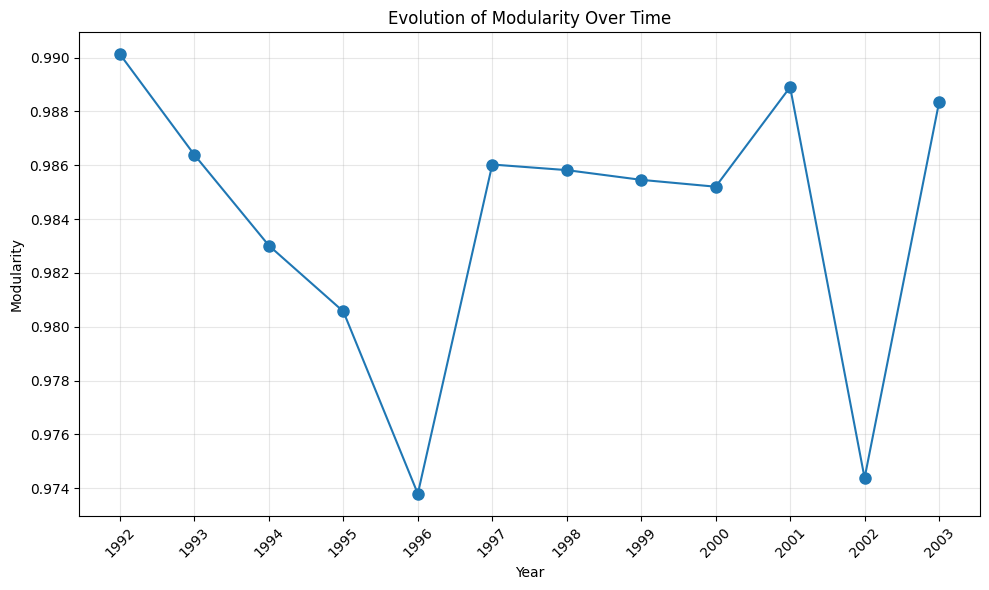

In [19]:
# A-3: Community Detection with Louvain Algorithm
import community as community_louvain
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm

# ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÖÿ≥€åÿ±Ÿáÿß
EDGES_DIR = "../data/edges_by_year"
OUTPUT_DIR = "../outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. ÿ®ÿßÿ±⁄Ø€åÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿ≤ŸÖÿßŸÜ€å
metrics_df = pd.read_csv(os.path.join(OUTPUT_DIR, "temporal_metrics.csv"))
years = metrics_df['year'].astype(str).tolist()

# 2. ÿ™ÿ¥ÿÆ€åÿµ ÿ¨ŸàÿßŸÖÿπ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ
community_data = []
modularity_values = []
sample_year = "2000"  # ÿ≥ÿßŸÑ ŸÜŸÖŸàŸÜŸá ÿ®ÿ±ÿß€å ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å

for year in tqdm(years, desc="Detecting communities"):
    # ÿ≥ÿßÿÆÿ™ ⁄Øÿ±ÿßŸÅ ÿ≥ÿßŸÑÿßŸÜŸá
    G = nx.Graph()
    edges_file = os.path.join(EDGES_DIR, f"edges_{year}.csv")
    
    with open(edges_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # ÿ±ÿØ ⁄©ÿ±ÿØŸÜ ŸáÿØÿ±
        for row in reader:
            src, dst = int(row[0]), int(row[1])
            G.add_edge(src, dst)
    
    # ÿßÿ¨ÿ±ÿß€å ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ Louvain
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    modularity_values.append(modularity)
    
    # ÿ™ÿ≠ŸÑ€åŸÑ ÿ≥ÿßÿÆÿ™ÿßÿ± ÿ¨ŸàÿßŸÖÿπ
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)
    
    community_sizes = [len(nodes) for nodes in communities.values()]
    n_communities = len(community_sizes)
    largest_comm_size = max(community_sizes) if community_sizes else 0
    
    # ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨
    community_data.append({
        'year': year,
        'modularity': modularity,
        'n_communities': n_communities,
        'largest_comm_size': largest_comm_size,
        'avg_community_size': np.mean(community_sizes)
    })
    
    # ÿ∞ÿÆ€åÿ±Ÿá ⁄Øÿ±ÿßŸÅ ŸÜŸÖŸàŸÜŸá ÿ®ÿ±ÿß€å ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å
    if year == sample_year:
        nx.set_node_attributes(G, partition, "community")
        sample_gexf = os.path.join(OUTPUT_DIR, f"communities_{year}.gexf")
        nx.write_gexf(G, sample_gexf)
        print(f"‚úÖ Sample community graph saved to: {sample_gexf}")

# 3. ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨
community_df = pd.DataFrame(community_data)
community_csv = os.path.join(OUTPUT_DIR, "community_metrics.csv")
community_df.to_csv(community_csv, index=False)
print(f"‚úÖ Community metrics saved to: {community_csv}")

# 4. ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å ÿ™⁄©ÿßŸÖŸÑ Modularity
plt.figure(figsize=(10, 6))
plt.plot(years, modularity_values, 'o-', markersize=8)
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.title('Evolution of Modularity Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

modularity_plot = os.path.join(OUTPUT_DIR, "modularity_evolution.png")
plt.savefig(modularity_plot, dpi=300)
print(f"‚úÖ Modularity evolution plot saved to: {modularity_plot}")

#  ÿ¥ÿ®€åŸá‚Äåÿ≥ÿßÿ≤€å ŸÖÿØŸÑ SI